## Pair Programming Preprocesado

In [62]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:


* Realizar el ajuste o ajustes de los modelos


In [63]:
df_esta = pd.read_pickle("../Datos/obesity_est_encoding.pkl")
df_esta.head()

,index,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,nivel_obesidad,age,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital,height,weight
0,0,0,1,0,2,0,0,3,3,1,-0.521741,2.0,3.0,2.0,0.0,1.0,-0.875589,-0.862558
1,1,0,1,0,2,1,1,2,3,1,-0.521741,3.0,3.0,3.0,3.0,0.0,-1.947599,-1.168077
2,2,1,1,0,2,0,0,1,3,1,-0.207057,2.0,3.0,2.0,2.0,1.0,1.054029,-0.366090
3,3,1,0,0,2,0,0,1,4,5,0.422312,3.0,3.0,2.0,2.0,0.0,1.054029,0.015808
4,4,1,0,0,2,0,0,2,3,6,-0.364399,2.0,1.0,2.0,0.0,0.0,0.839627,0.122740


Realización del modelo con variables codificadas y estandarizadas

Separamos los datos

In [64]:
# separamos los datos en X e y

X1 = df_esta.drop("nivel_obesidad", axis = 1)
y1 = df_esta["nivel_obesidad"]

In [65]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

X1.head()

,index,gender,antecedentes_familiares,comida_calorica,snacks,smoke,mide_calorias,freq_alcohol,medio_transporte,age,vegetales,num_comidas_dia,cantidad_agua_dia,freq_ejercicio,tiempo_digital,height,weight
0,0,0,1,0,2,0,0,3,3,-0.521741,2.0,3.0,2.0,0.0,1.0,-0.875589,-0.862558
1,1,0,1,0,2,1,1,2,3,-0.521741,3.0,3.0,3.0,3.0,0.0,-1.947599,-1.168077
2,2,1,1,0,2,0,0,1,3,-0.207057,2.0,3.0,2.0,2.0,1.0,1.054029,-0.366090
3,3,1,0,0,2,0,0,1,4,0.422312,3.0,3.0,2.0,2.0,0.0,1.054029,0.015808
4,4,1,0,0,2,0,0,2,3,-0.364399,2.0,1.0,2.0,0.0,0.0,0.839627,0.122740


In [66]:
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

y1.head()

0    1
1    1
2    1
3    5
4    6
Name: nivel_obesidad, dtype: int64

Train-Test split

In [67]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [68]:
df_esta.isnull().sum()

index                      0
gender                     0
antecedentes_familiares    0
comida_calorica            0
snacks                     0
smoke                      0
mide_calorias              0
freq_alcohol               0
medio_transporte           0
nivel_obesidad             0
age                        0
vegetales                  0
num_comidas_dia            0
cantidad_agua_dia          0
freq_ejercicio             0
tiempo_digital             0
height                     0
weight                     0
dtype: int64

Ajuste y predicción del modelo

In [69]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

/Users/feliciano/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
162,1,1,Train
2001,4,4,Train
1435,2,2,Train
649,0,0,Train
1280,2,2,Train


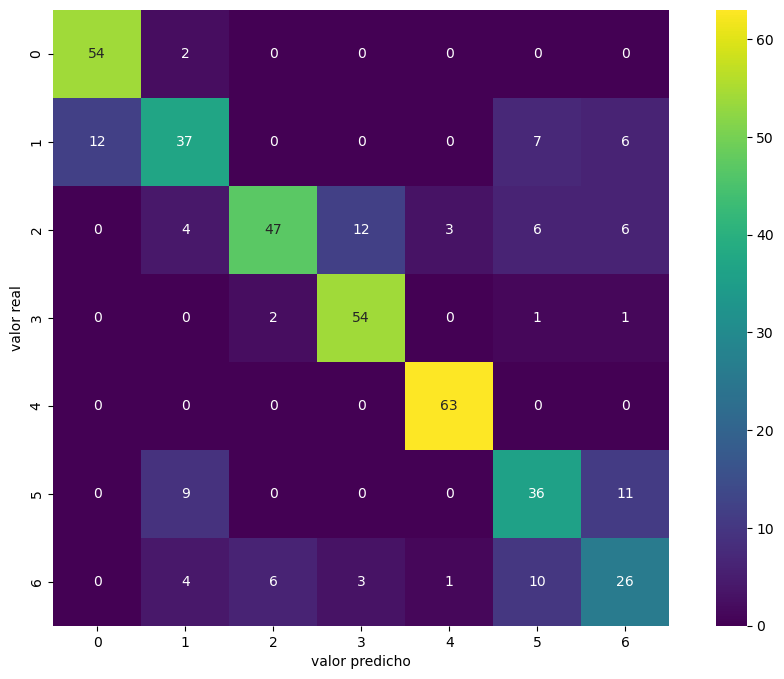

In [71]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Recordemos nuestras categorías de nuestra variable respuesta:


|  nivel_obesidad: 	|   	|   	|   	|   	|   	|   	|
|---	|---	|---	|---	|---	|---	|---	|
|  Insufficient_Weight = 0 	|  Normal_Weight = 1 	|  Obesity_Type_I = 2 	|  Obesity_Type_II = 3 	|  Obesity_Type_III = 4 	| Overweight_Level_I = 5  	|   Overweight_Level_II = 6	|

Conclusiones de nuestro modelo:
 * En general el nivel de aciertos es mayor que el nivel de errores en todas las categorías.
 * Teniendo en algunos casos incluso errores de 0 personas.
 * Por ejemplo, ha fallado con categorias cercanas, en el caso de normal weight catalogó a 12 personas como insufficient weight siendo estas normal.
 * A 9 personas que tenían overweight level I las catalogó como normal weight.
 * También observamos que en las categorías 1, 5 y 6 el nivel de aciertos ha sido menor que en el resto. 
 
 En resumen, los errores los cometió colocando a personas en categorías cercanas a la verdadera.
 
 Por lo que podemos concluír que nuestro modelo es bueno al visualizarlo con un heatmap, lo comprobaremos en las métricas.

* Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.